# Pip installs

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.3 MB/s eta 0:00:00


In [3]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=8b7a131fb25174d7df2aa7fb11cd83a6712f198cbec3fc16c0abb2c64877ff92
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [4]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 27.6 MB/s eta 0:00:00


# Imports

In [6]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import transformers as ppb
import seaborn as sns
import matplotlib.patheffects as PathEffects
import sklearn

%matplotlib inline

from time import time
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV
from transformers import BertModel, BertConfig
from sklearn import neighbors, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [7]:
# For doc2vecC we need to import files from personal google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Data Preprocessing, Test and Train

## Train dataframe

In [63]:
df=pd.read_csv('./drive/Shareddrives/Liar_Project/Dataset/train.tsv',sep='\t', header=None)

In [64]:
df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [65]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [66]:
df.isnull().sum()

id                      0
label                   0
statement               0
subjects                2
speaker                 2
speaker_job_title    2897
state_info           2208
party_affiliation       2
count_1                 2
count_2                 2
count_3                 2
count_4                 2
count_5                 2
context               102
dtype: int64

In [67]:
# replaces all "null" or "NaN" values with an empty string
df.fillna("", inplace=True)
df.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [68]:
df['label'].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [69]:
df_2_cat_imb = df.copy()
df_2_cat_bal = df.copy()
df_3_cat_imb = df.copy()
df_3_cat_bal = df.copy()

In [70]:
df.shape

(10240, 14)

## Categories to codes

In [71]:
replace_label = {'false': 0, 'half-true': 1, 'mostly-true': 1, 'true': 1, 'barely-true': 0, 'pants-fire': 0}

In [72]:
df.label = [replace_label[item] for item in df.label]

In [73]:
df.head(3)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver


## Removing rows with more than 350 characters in their statement column

Run it for doc2vecC

In [74]:
df['ZipLen'] = df['statement'].astype(str).map(len)
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context,ZipLen
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release,78
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54


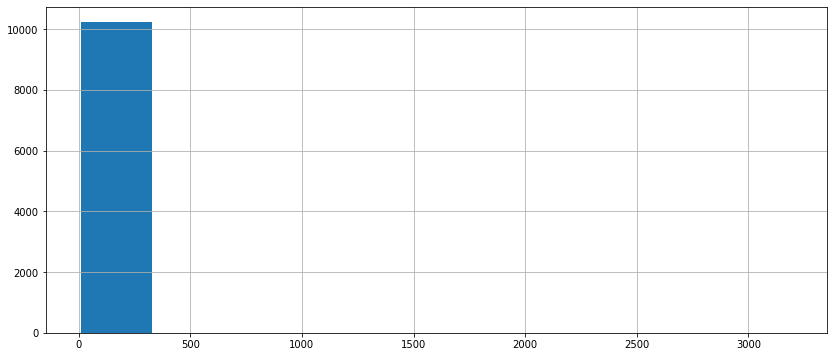

In [75]:
len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

# There should be some rows with more than 500 characters in statement

In [76]:
# Removing rows that contains more than 500 characters in statement

df = df[df.ZipLen < 350]

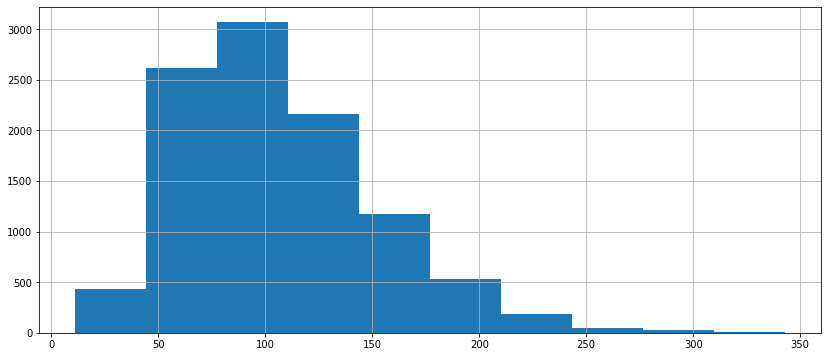

In [77]:
# Again see the distribution of the statement's length

len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

In [78]:
df.shape

(10232, 15)

## Test dataframe

In [79]:
df_test = pd.read_csv('./drive/Shareddrives/Liar_Project/Dataset/test.tsv',sep='\t', header=None)

In [80]:
df_test.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [81]:
df_test.isnull().sum()

id                     0
label                  0
statement              0
subjects               0
speaker                0
speaker_job_title    325
state_info           262
party_affiliation      0
count_1                0
count_2                0
count_3                0
count_4                0
count_5                0
context               17
dtype: int64

In [82]:
df_test.fillna("", inplace=True)
df_test.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [83]:
df_test.head(2)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference


In [84]:
df_2_cat_imb_test = df_test.copy()
df_2_cat_bal_test = df_test.copy()
df_3_cat_imb_test = df_test.copy()
df_3_cat_bal_test = df_test.copy()

## Changing the test labels to numbers

In [85]:
df_test.label = [replace_label[item] for item in df_test.label]

In [86]:
df_test.head(3)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11972.json,1,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,0,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.


## Removing rows in test set that has statements more than 350 characters
Run it for doc2vecC

In [87]:
df_test['ZipLen'] = df_test['statement'].astype(str).map(len)
df_test.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context,ZipLen
0,11972.json,1,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,68
1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,63
2,11096.json,0,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,51
3,5209.json,1,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,85
4,9524.json,0,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,,Wisconsin,democrat,5,7,2,2,7,a web video,127


In [88]:
df_test = df_test[df_test.ZipLen < 350]

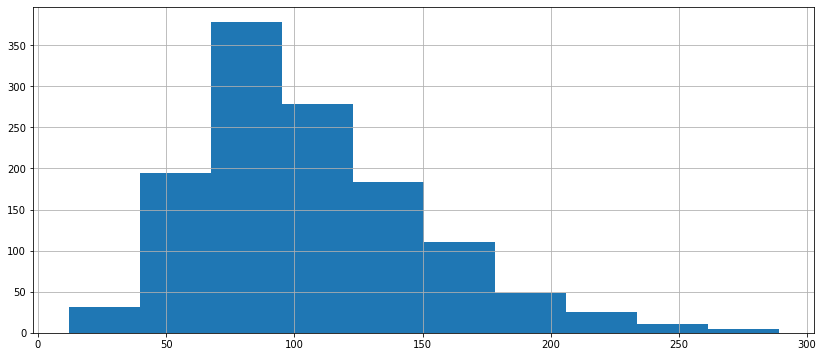

In [89]:
len_sent = df_test['ZipLen']
len_sent.hist(figsize=[14,6]);

In [90]:
df_test.shape

(1265, 15)

## Removing non-ascii characters in test and train dataframes

In [91]:
df.shape

(10232, 15)

In [92]:
df = df[df['statement'].map(lambda x: x.isascii())]

In [93]:
df.shape

(10226, 15)

In [94]:
df_test.shape

(1265, 15)

In [95]:
df_test = df_test[df_test['statement'].map(lambda x: x.isascii())]

In [96]:
df_test.shape

(1265, 15)

# Shell cells for doc2vecC

## Train embeddings

In [ ]:
# Creating "statements" folder in the drive. Read from statement column and create text files in the folder.

df.reset_index()
for i in df['statement'].index:
  with open('./drive/Shareddrives/Liar_Project/bash/statements/sentences/'+ '{0:05}'.format(i) + '.txt', 'w') as f:
    f.write(df['statement'][i])

In [ ]:
df.shape

(10226, 15)

In [ ]:
%%shell
cd drive/Shareddrives/Liar_Project/bash/statements/sentences/
ls | wc -l

10226


In [ ]:
# Now that we have all the input data we run go.sh script to create vectors
# The output would be a txt file with 256 features

%%shell
cd drive/Shareddrives/Liar_Project/bash/
bash go.sh

rm: cannot remove 'temp': No such file or directory
rm: cannot remove 'sentences/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/sentences/norm.txt
Vocab size: 2076
Words in train file: 192757
Alpha: 0.000218  Progress: 99.82%  Words/thread/sec: 111.79k  finish embedding training
writing sentence vector ...

real	0m26.338s
user	0m35.487s
sys	0m0.544s


In [ ]:
# %%shell

# head -10 ./statements/sentences/norm.txt

In [ ]:
# %%shell

# mv ./wordvectors.txt drive/MyDrive/Liar_project/

In [ ]:
# Creating features without using np and then converting to np array

# with open("./drive/Shareddrives/Liar_Project/", "r") as file:
#     features = [[x for x in line.split()] for line in file]

# features = np.array(features)

## Test embeddings

In [ ]:
df.reset_index()
for i in df_test['statement'].index:
  with open('./drive/Shareddrives/Liar_Project/bash/statements/test_sentences/'+ '{0:04}'.format(i) + '.txt', 'w') as f:
    f.write(df_test['statement'][i])

In [ ]:
df_test.shape

(1265, 15)

In [ ]:
%%shell
cd drive/Shareddrives/Liar_Project/bash/statements/test_sentences/
ls | wc -l

1266


In [ ]:
%%shell

cd drive/Shareddrives/Liar_Project/bash/
bash go_test.sh

rm: cannot remove 'test_sentences/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/test_sentences/norm.txt
Vocab size: 374
Words in train file: 19081
finish embedding training
writing sentence vector ...

real	0m2.548s
user	0m3.465s
sys	0m0.234s


# Feature vectors from doc2vecC 

In [42]:
features_dvc = np.loadtxt("./drive/Shareddrives/Liar_Project/bash/docvectors.txt")
features_dvc.shape

(10228, 256)

In [43]:
features_dvc = features_dvc[:10226,:]
features_dvc.shape

(10226, 256)

In [44]:
# Create "features" numpy array from vectors 
features_dvc_test = np.loadtxt("./drive/Shareddrives/Liar_Project/bash/docvectors_test.txt")
features_dvc_test = features_dvc_test[0:1265,:]
features_dvc_test.shape

(1265, 256)

# X_train, x_test split

In [97]:
X_train = features_dvc
y_train = df.label

X_test = features_dvc_test
y_test = df_test.label

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10226, 256), (10226,), (1265, 256), (1265,))

In [98]:
y_test.value_counts()

1    712
0    553
Name: label, dtype: int64

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(features_dvc, df.label, test_size=0.2, random_state=42)

# Balancing the dataset

In [117]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
print(Counter(y_under))

Counter({1: 5747, 0: 4479})
Counter({0: 4479, 1: 4479})


In [108]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_t_under, y_t_under = undersample.fit_resample(X_test, y_test)
# summarize class distribution
print(Counter(y_test))
print(Counter(y_t_under))

Counter({1: 712, 0: 553})
Counter({0: 553, 1: 553})


# Modeling: SVM

In [118]:
# SVM
clf = svm.SVC(kernel = 'rbf',gamma="auto", probability=True)
clf.fit(X_under, y_under)

# predict on training examples
y_pred_svm = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.5335968379446641


In [119]:
y_pred_train = clf.predict(X_under)
print(accuracy_score(y_under, y_pred_train))

0.5635186425541415


In [121]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_train)

0.12703728510828305

In [122]:
f1_score(y_test, y_pred_svm)

0.4750889679715303

In [123]:
precision_score(y_test, y_pred_svm)

0.6480582524271845

In [124]:
recall_score(y_test, y_pred_svm)

0.375

In [125]:
# y_score = np.array([y for y in clf.predict_proba(X_test)])
# pred_SVM = y_score/y_score.sum(axis=1)
# roc_auc_score(y_true = y_test, y_score = pred_SVM)

roc_auc_score(y_test, clf.decision_function(X_test))

0.5895371517971433

# Modeling: KNN

In [126]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

y_pred_knn = knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test == y_pred_knn)/y_test.shape[0])*100))

Accuracy=48.85375494071146%


In [127]:
y_pred_knn_train = knn_best.predict(X_under)
print("Accuracy={}%".format((sum(y_under == y_pred_knn_train)/y_under.shape[0])*100))

Accuracy=67.16901093994196%


In [128]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_knn_train)

0.34338021879883907

In [129]:
f1_score(y_test, y_pred_knn)

0.40037071362372567

In [130]:
precision_score(y_test, y_pred_knn)

0.5885558583106267

In [131]:
recall_score(y_test, y_pred_knn)

0.30337078651685395

In [132]:
y_scores = knn_best.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.4964341589288254

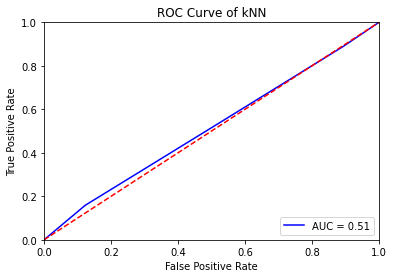

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# TSNE & PCA

### TSNE

In [ ]:
labels = df.label.values
labels.shape, features_dvc.shape

((10226,), (10226, 256))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(features_dvc)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.007s...
[t-SNE] Computed neighbors for 10226 samples in 3.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.233278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.321243
[t-SNE] KL 

In [ ]:
z.shape, labels.shape, features_dvc.shape

((10226, 2), (10226,), (10226, 256))

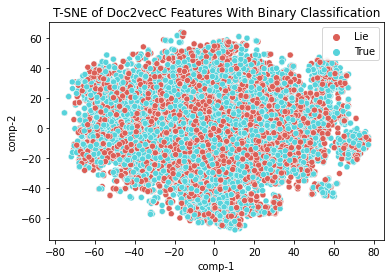

In [ ]:
df1 = pd.DataFrame()
labels = df['label'].map({0: 'Lie', 1: 'True'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                
                palette=sns.color_palette("hls", 2),
                data=df1).set(title="T-SNE of Doc2vecC Features With Binary Classification");
plt.savefig('doc2vecC-tsne-binary.png')

### PCA

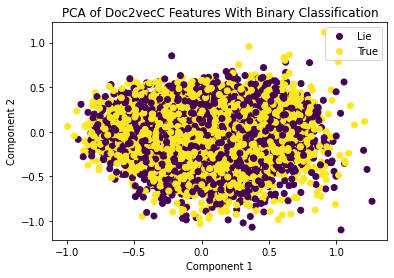

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(features_dvc)
Xt = pca.transform(features_dvc)
labels = df['label']

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Lie', 'True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA of Doc2vecC Features With Binary Classification")
plt.savefig('doc2vecC-PCA-binary')
plt.show();